In [1]:
import pandas as pd

# '2017-12-04' <= d <= '2017-12-08'
# '2018-11-28' <= d
CVS_AET = "/Volumes/ROHIT/SURE Data/buysellindicatorscvsaet.sas7bdat"
CVS_AETClose = "/Volumes/ROHIT/SURE Data/buysellcvsaetclose.sas7bdat"

# '2018-10-29' <= d <= '2018-11-02'
# '2019-07-09' <= d
#RHT_IBM = "/Volumes/ROHIT/SURE Data/buysellrhtibm.sas7bdat"
#RHT_IBM = "/Volumes/ROHIT/SURE Data/buysellrhtibmclose.sas7bdat"

df = pd.read_sas(CVS_AET,format = 'sas7bdat')
df3 = pd.read_sas(CVS_AETClose,format = 'sas7bdat')

In [2]:
df.columns

Index(['DATE', 'TIME_M', 'SYM_ROOT', 'type', 'EX', 'SIZE', 'PRICE',
       'TR_STOP_IND', 'TR_SEQNUM', 'TR_ID', 'TTE_IND', 'QTime', 'NBO', 'NBB',
       'NBOqty', 'NBBqty', 'midpoint', 'lock', 'cross', 'direction2',
       'BuySellLR', 'BuySellEMO', 'BuySellCLNV', 'ofr30', 'bid30',
       'wEffectiveSpread_Dollar', 'wEffectiveSpread_Percent', 'dollar',
       'wEffectiveSpread_Dollar_DW', 'wEffectiveSpread_Dollar_SW',
       'wEffectiveSpread_Percent_DW', 'wEffectiveSpread_Percent_SW'],
      dtype='object')

In [3]:
df2 = df.reindex(columns=['DATE','TIME_M','SYM_ROOT','SIZE','PRICE','NBO','NBB','NBOqty','NBBqty','BuySellLR','dollar','wEffectiveSpread_Dollar','midpoint'])
df2['TIME_M'] = df2['TIME_M'].astype('float64') 
df2['TIME_M'] = pd.to_datetime(df2["TIME_M"], unit='s').dt.strftime("%H:%M:%S.%f")
df2['Datetime'] = pd.to_datetime(df2["DATE"].astype(str) + " " + df2["TIME_M"].astype(str))
df2 = df2.set_index(['Datetime'])

In [ ]:
df4 = df3.reindex(columns=['DATE','TIME_M','SYM_ROOT','SIZE','PRICE','NBO','NBB','NBOqty','NBBqty','BuySellLR','dollar','wEffectiveSpread_Dollar','midpoint'])
df4['TIME_M'] = df4['TIME_M'].astype('float64') 
df4['TIME_M'] = pd.to_datetime(df4["TIME_M"], unit='s').dt.strftime("%H:%M:%S.%f")
df4['Datetime'] = pd.to_datetime(df4["DATE"].astype(str) + " " + df4["TIME_M"].astype(str))
df4 = df4.set_index(['Datetime'])

In [4]:
df2

,DATE,TIME_M,SYM_ROOT,SIZE,PRICE,NBO,NBB,NBOqty,NBBqty,BuySellLR,dollar,wEffectiveSpread_Dollar,midpoint
Datetime,,,,,,,,,,,,,
2017-11-01 09:31:45.115703,2017-11-01,09:31:45.115703,b'AET',18036.0,170.9200,171.16,170.13,1200.0,400.0,1.0,3082713.12,0.5500,170.645
2017-11-01 09:31:45.121328,2017-11-01,09:31:45.121328,b'AET',48.0,171.0000,171.16,170.81,1200.0,100.0,1.0,8208.00,0.0300,170.985
2017-11-01 09:31:45.121366,2017-11-01,09:31:45.121366,b'AET',100.0,171.1500,171.16,170.81,100.0,100.0,1.0,17115.00,0.3300,170.985
2017-11-01 09:31:45.121382,2017-11-01,09:31:45.121382,b'AET',100.0,171.1600,171.08,170.81,100.0,100.0,1.0,17116.00,0.4300,170.945
2017-11-01 09:31:45.121400,2017-11-01,09:31:45.121400,b'AET',100.0,171.1600,171.08,170.81,100.0,100.0,1.0,17116.00,0.4300,170.945
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-29 15:59:59.988327,2017-12-29,15:59:59.988327,b'CVS',651.0,72.5600,72.56,72.54,2100.0,11800.0,1.0,47236.56,0.0200,72.550
2017-12-29 15:59:59.989667,2017-12-29,15:59:59.989667,b'CVS',900.0,72.5599,72.56,72.54,2100.0,11800.0,1.0,65303.91,0.0198,72.550
2017-12-29 15:59:59.992818,2017-12-29,15:59:59.992818,b'CVS',200.0,72.5600,72.56,72.54,2100.0,11800.0,1.0,14512.00,0.0200,72.550


In [5]:
import numpy as np
dfACQ = df2[df2['SYM_ROOT'] == b'CVS']
dfTAR = df2[df2['SYM_ROOT'] == b'AET']

def volatility(x):
    if len(x) > 1:
        return x.pct_change(periods=1).std()

In [50]:
#Moving Average of price, dollar volume, midpoint, spread, nbo, nbb
dfACQ2 = dfACQ[['PRICE','dollar','midpoint','wEffectiveSpread_Dollar','NBO','NBB']].groupby(dfACQ['DATE']).resample('1Min').mean()
dfACQ2['logPrice'] = np.log(dfACQ2['PRICE'])
#log returns by minute based on last price in minute interval
dfACQ2['returns'] = np.log(dfACQ[['PRICE']]).groupby(dfACQ['DATE']).resample('1Min').last().pct_change(periods=1)
# Volatility based on std of returns minute by minute
dfACQ2['Volatility'] = np.log(dfACQ[['PRICE']]).groupby(dfACQ['DATE']).resample('1Min').apply(volatility)
multIndex = np.array(dfACQ2.index.tolist(),dtype='datetime64')
times = pd.to_datetime(multIndex[:,1])
dfACQ2['Time'] = times.strftime("%H:%M")
dfACQ2 = dfACQ2.reset_index()

dfTAR2 = dfTAR[['PRICE','dollar','midpoint','wEffectiveSpread_Dollar','NBO','NBB']].groupby(dfTAR['DATE']).resample('1Min').mean()
dfTAR2['logPrice'] = np.log(dfTAR2["PRICE"])
dfTAR2['returns'] = np.log(dfTAR[['PRICE']]).groupby(dfTAR['DATE']).resample('1Min').last().pct_change(periods=1)
dfTAR2['Volatility'] = np.log(dfTAR[['PRICE']]).groupby(dfTAR['DATE']).resample('1Min').apply(volatility)
multIndex2 = np.array(dfTAR2.index.tolist(),dtype='datetime64')
times2 = pd.to_datetime(multIndex2[:,1])
dfTAR2['Time'] = times2.strftime("%H:%M")
dfTAR2 = dfTAR2.reset_index()

In [ ]:
dfACQ3 = df4[df4['SYM_ROOT'] == b'CVS']
dfTAR3 = df4[df4['SYM_ROOT'] == b'AET']

dfACQ4 = dfACQ3[['PRICE','dollar','midpoint','wEffectiveSpread_Dollar','NBO','NBB']].groupby(dfACQ3['DATE']).resample('1Min').mean()
dfACQ4['returns'] = dfACQ3[['PRICE']].groupby(dfACQ3['DATE']).resample('1Min').last().pct_change(periods=1)
dfACQ4['Volatility'] = dfACQ3[['PRICE']].groupby(dfACQ3['DATE']).resample('1Min').apply(volatility)
multIndex3 = np.array(dfACQ4.index.tolist(),dtype='datetime64')
times3 = pd.to_datetime(multIndex3[:,1])
dfACQ4['Time'] = times3.strftime("%H:%M")
dfACQ4 = dfACQ4.reset_index()

dfTAR4 = dfTAR3[['PRICE','dollar','midpoint','wEffectiveSpread_Dollar','NBO','NBB']].groupby(dfTAR3['DATE']).resample('1Min').mean()
dfTAR4['returns'] = dfTAR3[['PRICE']].groupby(dfTAR3['DATE']).resample('1Min').last().pct_change(periods=1)
dfTAR4['Volatility'] = dfTAR3[['PRICE']].groupby(dfTAR3['DATE']).resample('1Min').apply(volatility)
multIndex4 = np.array(dfTAR4.index.tolist(),dtype='datetime64')
times4 = pd.to_datetime(multIndex4[:,1])
dfTAR4['Time'] = times4.strftime("%H:%M")
dfTAR4 = dfTAR4.reset_index()

In [51]:
dfACQ2['Announce'] = ((dfACQ2['DATE'].astype("str") >= '2017-12-04') & 
                      (dfACQ2['DATE'].astype("str") <= '2017-12-11')).astype(int)

dfTAR2['Announce'] = ((dfTAR2['DATE'].astype("str") >= '2017-12-04') & 
                      (dfTAR2['DATE'].astype("str") <= '2017-12-11')).astype(int)

In [55]:
dfACQ2Temp = dfACQ2.copy()
dfTAR2Temp = dfTAR2.copy()


dfACQ2Temp['1/L'] = (np.square(dfACQ2['Volatility']) / dfACQ2['dollar']) **(1/3)
dfACQ2Temp = dfACQ2Temp[dfACQ2Temp['1/L'] != 0]
dfACQ2Temp['1/L'] = np.log(dfACQ2Temp['1/L'])
dfACQ2Temp['S/P'] = dfACQ2['wEffectiveSpread_Dollar'] / dfACQ2['PRICE']
dfACQ2Temp = dfACQ2Temp[dfACQ2Temp['S/P'] != 0]
dfACQ2Temp['S/P'] = np.log(dfACQ2Temp['S/P'])

dfTAR2Temp['1/L'] = (np.square(dfTAR2['Volatility']) / dfTAR2['dollar']) **(1/3)
dfTAR2Temp = dfTAR2Temp[dfTAR2Temp['1/L'] != 0]
dfTAR2Temp['1/L'] = np.log(dfTAR2Temp['1/L'])
dfTAR2Temp['S/P'] = dfTAR2['wEffectiveSpread_Dollar'] / dfTAR2['PRICE']
dfTAR2Temp = dfTAR2Temp[dfTAR2Temp['S/P'] != 0]
dfTAR2Temp['S/P'] = np.log(dfTAR2Temp['S/P'])

dfACQ2Temp = dfACQ2Temp.dropna()
dfTAR2Temp = dfTAR2Temp.dropna()

In [ ]:
import statsmodels.api as sm
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

In [17]:
#price will have a time trend???
# How to detrend this data
x = dfACQ2[['dollar','returns','Announce']]
x1 = dfTAR2[['dollar','returns','Announce']]
y = dfACQ2[['wEffectiveSpread_Dollar']]
y1 = dfTAR2[['wEffectiveSpread_Dollar']]
x = sm.add_constant(x)
x1 = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model1 = sm.OLS(y1,x1).fit()

stargazer = Stargazer([model,model1])
stargazer.title('Spread test after announcement')
stargazer.custom_columns(['Acquirer','Target'],[1,1])
HTML(stargazer.render_html())

In [56]:
x = dfACQ2Temp[['1/L']]
x1 = dfTAR2Temp[['1/L']]
y = dfACQ2Temp[['S/P']]
y1 = dfTAR2Temp[['S/P']]

x = sm.add_constant(x)
x1 = sm.add_constant(x1)
model = sm.OLS(y,x).fit()
model1 = sm.OLS(y1,x1).fit()

stargazer = Stargazer([model,model1])
stargazer.title('Invariance Hypotheis')
stargazer.custom_columns(['Acquirer','Target'],[1,1])
HTML(stargazer.render_html())

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt
datesA = set(dfACQ2['DATE'].astype("str").tolist())

In [1]:
fig, ax = plt.subplots(figsize=(20,20))
for d in datesA:
    if '2017-12-04' <= d <= '2017-12-11':
        #dfACQ2[dfACQ2['DATE'] == d].plot(x='Time',y='Volatility',ax=ax,color='r',ylim=(0,0.02),legend=None)
        dfTAR2[dfTAR2['DATE'] == d].plot(x='Time',y='Volatility',ax=ax,color='r',ylim=(0,0.01),legend=None)
    else:
        #dfACQ2[dfACQ2['DATE'] == d].plot(x='Time',y='Volatility',ax=ax,color='b',ylim=(0,0.02),legend=None)
        dfTAR2[dfTAR2['DATE'] == d].plot(x='Time',y='Volatility',ax=ax,color='b',ylim=(0,0.01),legend=None)

NameError: name 'plt' is not defined

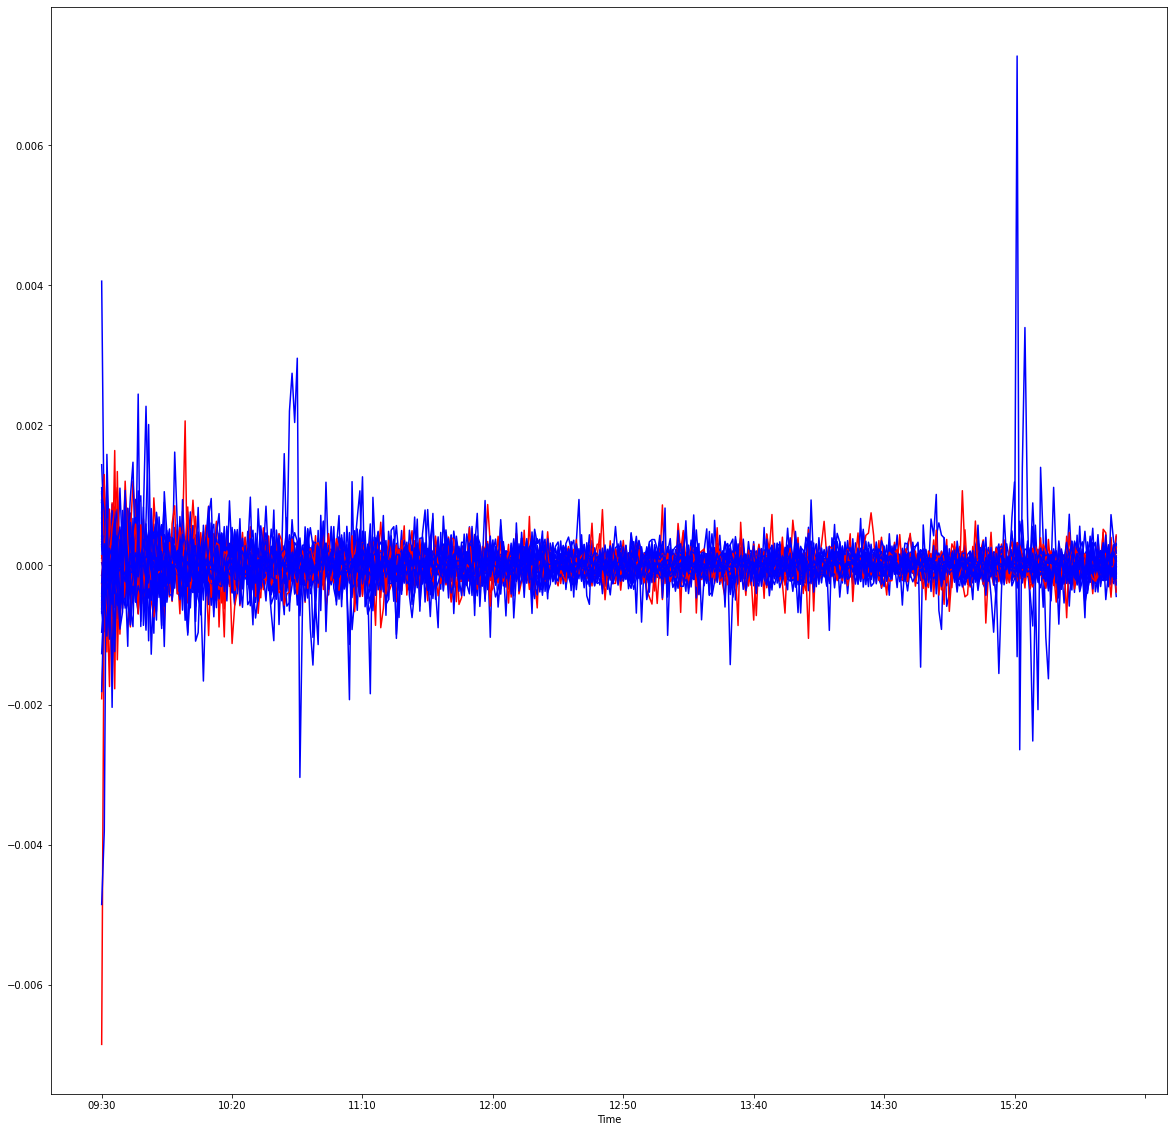

In [62]:
fig, ax = plt.subplots(figsize=(20,20))
for d in datesA:
    if '2017-12-04' <= d <= '2017-12-11':
        dfACQ2[dfACQ2['DATE'] == d].plot(x='Time',y='returns',ax=ax,color='r',legend=None)
        #dfTAR2[dfTAR2['DATE'] == d].plot(x='Time',y='returns',ax=ax,color='r',legend=None)
    else:
        dfACQ2[dfACQ2['DATE'] == d].plot(x='Time',y='returns',ax=ax,color='b',legend=None)
        #dfTAR2[dfTAR2['DATE'] == d].plot(x='Time',y='returns',ax=ax,color='b',legend=None)

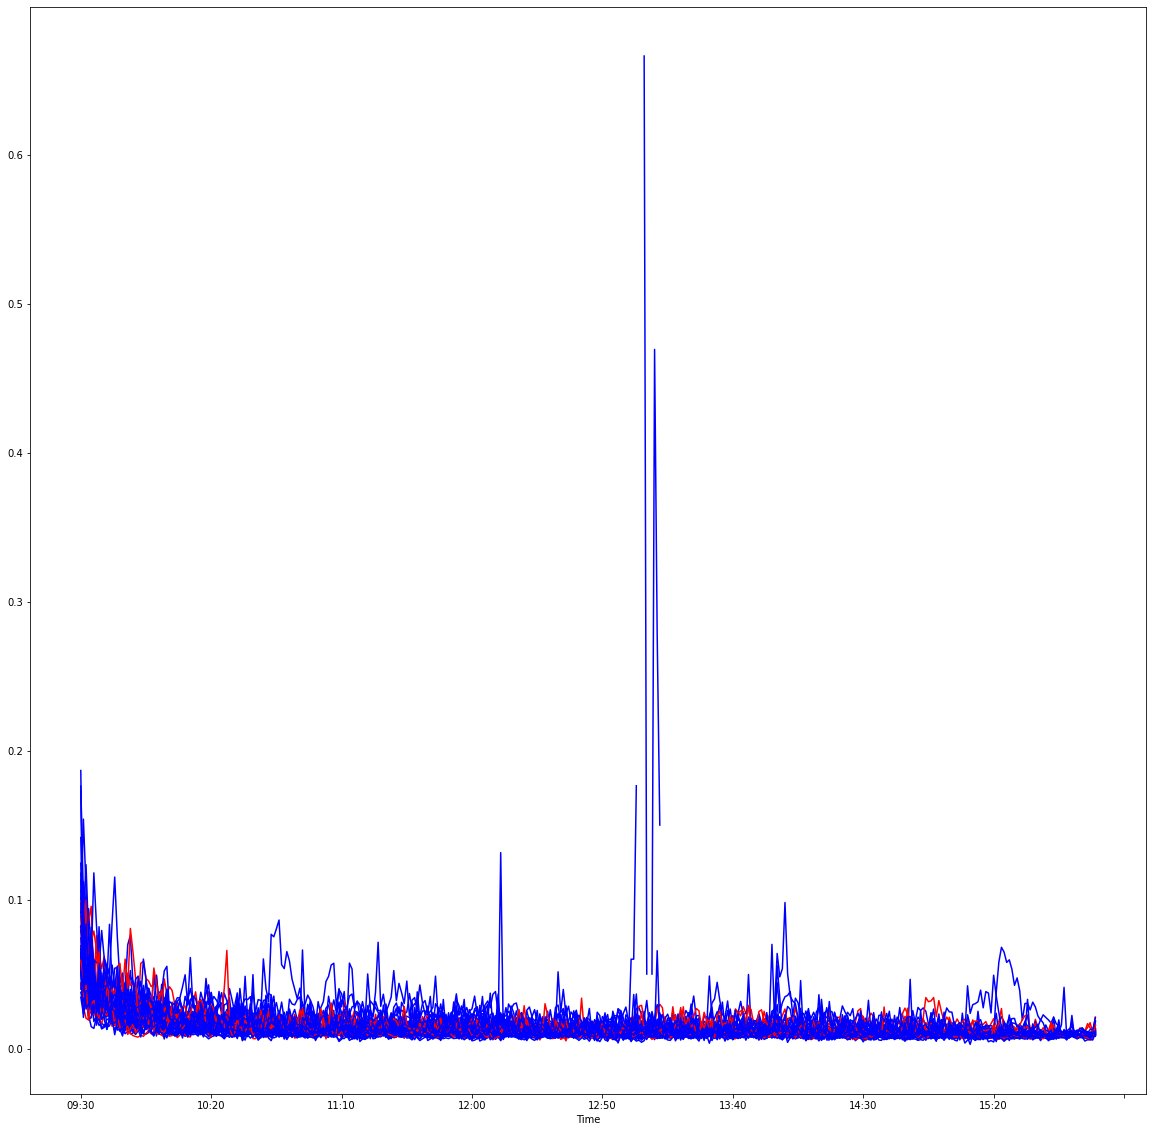

In [61]:
fig, ax = plt.subplots(figsize=(20,20))
for d in datesA:
    if '2017-12-04' <= d <= '2017-12-11':
        dfACQ2[dfACQ2['DATE'] == d].plot(x='Time',y='wEffectiveSpread_Dollar',ax=ax,color='r',legend=None)
        #dfTAR2[dfTAR2['DATE'] == d].plot(x='Time',y='wEffectiveSpread_Dollar',ax=ax,color='r',legend=None)
    else:
        dfACQ2[dfACQ2['DATE'] == d].plot(x='Time',y='wEffectiveSpread_Dollar',ax=ax,color='b',legend=None)
        #dfTAR2[dfTAR2['DATE'] == d].plot(x='Time',y='wEffectiveSpread_Dollar',ax=ax,color='b',legend=None)

In [ ]:
datesC = set(dfACQ4['DATE'].astype("str").tolist())

fig, ax = plt.subplots(figsize=(20,20))
for d in datesC:
    if '2018-11-28' <= d:
        dfACQ4[dfACQ4['DATE'] == d].plot(x='Time',y='wEffectiveSpread_Dollar',ax=ax,color='r',kind='scatter',legend=None)
        #dfTAR4[dfTAR4['DATE'] == d].plot(x='Time',y='wEffectiveSpread_Dollar',ax=ax,color='r',kind='scatter',legend=None)
    else:
        dfACQ4[dfACQ4['DATE'] == d].plot(x='Time',y='wEffectiveSpread_Dollar',ax=ax,color='b',kind='scatter',legend=None)
        #dfTAR4[dfTAR4['DATE'] == d].plot(x='Time',y='wEffectiveSpread_Dollar',ax=ax,color='b',kind='scatter',legend=None)